In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [9]:
# Sube el archivo desde tu ordenador
from google.colab import files
uploaded = files.upload()

Saving oficial_test.csv to oficial_test.csv


In [7]:
# 1. Cargar los 10 ficheros de módulos
modulos = []
for i in range(1, 11):
    df = pd.read_csv(f"bajo_{i}_procesado.csv", parse_dates=['fecha'])
    df['fecha_dia'] = df['fecha'].dt.date
    df = df.drop(columns='fecha')
    df = df.groupby('fecha_dia').mean(numeric_only=True).reset_index()
    df = df.add_suffix(f"_mod{i}")
    df = df.rename(columns={f"fecha_dia_mod{i}": "fecha_dia"})
    modulos.append(df)

# 2. Unirlos todos por fecha
media_diaria = modulos[0]
for df in modulos[1:]:
    media_diaria = media_diaria.merge(df, on='fecha_dia', how='inner')

# 3. Cargar el fichero oficial y procesar igual
oficial = pd.read_csv("oficial.csv", parse_dates=["fecha"])
oficial['fecha_dia'] = oficial['fecha'].dt.date
oficial = oficial.groupby("fecha_dia").mean(numeric_only=True).reset_index()

# 4. Renombrar columnas del sensor oficial para diferenciarlas
oficial = oficial.rename(columns={
    'PM2.5': 'PM2.5_ref',
    'Ozono': 'O3_ref',
    'NO2': 'NO2_ref'
})

# 5. Merge final con los datos oficiales
media_diaria = media_diaria.merge(oficial[['fecha_dia', 'PM2.5_ref', 'O3_ref', 'NO2_ref']], on='fecha_dia', how='inner')

# 6. Guardar resultado si se desea
media_diaria.to_csv("media_diaria.csv", index=False)

# 7. Mostrar resumen
print("Dimensiones:", media_diaria.shape)
print(media_diaria.head())

Dimensiones: (145, 134)
    fecha_dia  NO2_mod1       CO2_mod1    O3_mod1  CO_mod1  CH20_mod1  \
0  2024-04-20   18800.0  808565.750365  39.240000    572.5  16.226645   
1  2024-04-21   18800.0  818451.937865  39.240000    572.5  15.590625   
2  2024-04-22   18800.0  833019.329029  39.287688    572.5  15.328874   
3  2024-04-23   18800.0  786904.772295  39.240000    572.5  14.779751   
4  2024-04-24   18800.0  801344.237208  39.253625    572.5  14.970779   

    Tª_mod1  Humedad_mod1  PM1.0_mod1  PM2.5_mod1  ...  Humedad_mod10  \
0  9.609681     74.721562   18.391754   22.617919  ...      61.575384   
1  9.706753     71.546528   16.419061   20.147770  ...      60.368458   
2  9.031566     72.358644   15.150755   18.629398  ...      63.363085   
3  8.649795     49.359375   14.225201   17.404441  ...      44.287738   
4  9.049430     52.416064   14.890479   18.175201  ...      46.204057   

   PM1.0_mod10  PM2.5_mod10  PM10.0_mod10  Hora_mod10  modid_mod10  \
0    18.380111    22.454451 

In [11]:
import pandas as pd

# 1. Cargar los 10 ficheros de módulos para "test"
modulos_test = []
for i in range(1, 11):
    df = pd.read_csv(f"bajo_test_{i}_procesado.csv", parse_dates=['fecha'])
    df['fecha_dia'] = df['fecha'].dt.date
    df = df.drop(columns='fecha')
    df = df.groupby('fecha_dia').mean(numeric_only=True).reset_index()
    df = df.add_suffix(f"_mod{i}")
    df = df.rename(columns={f"fecha_dia_mod{i}": "fecha_dia"})
    modulos_test.append(df)

# 2. Unirlos todos por fecha
media_diaria_test = modulos_test[0]
for df in modulos_test[1:]:
    media_diaria_test = media_diaria_test.merge(df, on='fecha_dia', how='inner')

# 3. Cargar el fichero oficial correspondiente y procesar igual
oficial_test = pd.read_csv("oficial_test.csv", parse_dates=["fecha"])
oficial_test['fecha_dia'] = oficial_test['fecha'].dt.date
oficial_test = oficial_test.groupby("fecha_dia").mean(numeric_only=True).reset_index()

# 4. Renombrar columnas del sensor oficial para diferenciarlas
oficial_test = oficial_test.rename(columns={
    'PM2.5': 'PM2.5_ref',
    'Ozono': 'O3_ref',
    'NO2': 'NO2_ref'
})

# 5. Merge final con los datos oficiales
media_diaria_test = media_diaria_test.merge(oficial_test[['fecha_dia', 'PM2.5_ref', 'O3_ref', 'NO2_ref']], on='fecha_dia', how='inner')

# 6. Guardar resultado si se desea
media_diaria_test.to_csv("media_diaria_test.csv", index=False)

# 7. Mostrar resumen
print("Dimensiones:", media_diaria_test.shape)
print(media_diaria_test.head())


Dimensiones: (15, 134)
    fecha_dia      NO2_mod1       CO2_mod1  O3_mod1  CO_mod1  CH20_mod1  \
0  2025-01-15  18800.000000  909726.541748    39.24    572.5  15.674622   
1  2025-01-17  18800.000000  884228.466659    39.24    572.5  15.002024   
2  2025-01-18  18800.000000  856599.123822    39.24    572.5  15.252723   
3  2025-01-19  18748.293472  944279.608350    39.24    572.5  15.357986   
4  2025-01-20  18529.025417  984203.751868    39.24    572.5  16.026389   

    Tª_mod1  Humedad_mod1  PM1.0_mod1  PM2.5_mod1  ...  Humedad_mod10  \
0  2.179386     64.451389   28.480631   35.097005  ...      56.218750   
1  5.203323     77.383329   17.114598   20.883352  ...      76.983557   
2  4.611197     71.769775   22.759320   27.840160  ...      62.376042   
3  3.994541     72.683023   25.831636   31.826931  ...      63.505556   
4  3.829600     82.610417   40.452368   49.846536  ...      69.664949   

   PM1.0_mod10  PM2.5_mod10  PM10.0_mod10  Hora_mod10  modid_mod10  \
0    27.606555   

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error, explained_variance_score
)
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import os

def ejecutar_pipeline_regresion(df, predictors, target_var, sensor_var, df_test):
    os.makedirs("graficas", exist_ok=True)  # Crear carpeta si no existe

    df = df.drop(columns=['PM10.0', 'PM1.0'], errors='ignore')

    corr_vars = predictors + [target_var]
    corr_matrix = df[corr_vars].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
                cbar_kws={"shrink": .8}, linewidths=0.5)
    plt.title("Mapa de correlaciones entre variables")
    plt.tight_layout()
    plt.savefig(f'graficas/{target_var}_correlacion_inicial.png', dpi=300)
    #plt.close()

    y_full = df[target_var]
    split_index = int(len(df) * 0.8)
    y_train = y_full.iloc[:split_index]
    y_val = y_full.iloc[split_index:]
    plt.figure(figsize=(8, 5))
    plt.hist(y_train, bins=20, alpha=0.6, label='Entrenamiento', color='steelblue', edgecolor='black')
    plt.hist(y_val, bins=20, alpha=0.6, label='Validación', color='orange', edgecolor='black')
    plt.xlabel("Valor de la variable objetivo")
    plt.ylabel("Frecuencia")
    plt.title("Distribución de la variable objetivo")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'graficas/{target_var}_histograma.png', dpi=300)
    #plt.close()

    if sensor_var and sensor_var in df.columns:
      X_base = df[[sensor_var]]
      y_base = df[target_var]
      split_index = int(len(X_base) * 0.8)
      X_train = X_base.iloc[:split_index]
      X_val = X_base.iloc[split_index:]
      y_train = y_base.iloc[:split_index]
      y_val = y_base.iloc[split_index:]

      model_r = LinearRegression()
      model_r.fit(X_train, y_train)
      y_train_pred = model_r.predict(X_train)
      y_val_pred = model_r.predict(X_val)

      metrics = {
          "RMSE": [
              np.sqrt(mean_squared_error(y_train, y_train_pred)),
              np.sqrt(mean_squared_error(y_val, y_val_pred))
          ],
          "MAE": [mean_absolute_error(y_train, y_train_pred),
                  mean_absolute_error(y_val, y_val_pred)],
          "R²": [r2_score(y_train, y_train_pred),
                r2_score(y_val, y_val_pred)]
      }
      metrics_df = pd.DataFrame(metrics, index=["Entrenamiento", "Validación"])
      print(f"Modelo base solo con {sensor_var}:")
      print(tabulate(metrics_df, headers='keys', tablefmt='github'))

      plt.figure(figsize=(12, 5))
      plt.plot(y_val.values, label=f"Valor real ({target_var})", color="black")
      plt.plot(y_val_pred, label="Predicción (modelo)", color="blue", alpha=0.7)
      plt.plot(X_val[sensor_var].values, label=f"Sensor sin calibrar ({sensor_var})", color="orange", alpha=0.7)

      plt.xlabel("Índice temporal")
      plt.ylabel(target_var)
      plt.title("Comparación: valor real vs. predicción vs. sensor")
      plt.legend()
      plt.grid(True)
      plt.tight_layout()
      plt.savefig(f'graficas/{target_var}_comparacion_base.png', dpi=300)


    #plt.close()

    X_full = df[predictors]
    y_full = df[target_var]
    split_index = int(len(X_full) * 0.8)
    X_train = X_full.iloc[:split_index]
    X_val = X_full.iloc[split_index:]
    y_train = y_full.iloc[:split_index]
    y_val = y_full.iloc[split_index:]

    model = LinearRegression()
    efs = EFS(model, min_features=1, max_features=X_train.shape[1], scoring='r2', print_progress=True, cv=0)
    efs.fit(X_train, y_train)
    results = efs.get_metric_dict()

    res_list = []
    for k, v in results.items():
        try:
            indices = np.array(v['feature_idx'])
            feature_names = list(X_train.columns[indices])
            X_train_sel = X_train.iloc[:, indices]
            X_val_sel = X_val.iloc[:, indices]
            model.fit(X_train_sel, y_train)
            r2_val = r2_score(y_val, model.predict(X_val_sel))
            res_list.append({
                'num_vars': len(indices),
                'features': feature_names,
                'R2_train': v['avg_score'],
                'R2_val': r2_val
            })
        except Exception as e:
            print(f"❌ ERROR con combinación {k}: {e}")

    res_df = pd.DataFrame(res_list).sort_values(by='R2_val', ascending=False)
    top5 = res_df.head(5)
    print("Top 5 combinaciones de variables por $R^2$ en validación:")
    print(tabulate(top5, headers='keys', tablefmt='github', showindex=False))

    summary = res_df.groupby("num_vars")["R2_val"].max().reset_index()
    plt.figure(figsize=(8, 5))
    plt.plot(summary["num_vars"], summary["R2_val"], marker='o')
    plt.title("R² en validación vs número de variables (Exhaustivo)")
    plt.xlabel("Número de variables")
    plt.ylabel("R² en validación")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'graficas/{target_var}_r2_vs_vars.png', dpi=300)
    #plt.close()

    best_features = res_df.iloc[0]['features']
    X = df[best_features]
    y = df[target_var]

    split_index = int(len(X) * 0.8)
    X_train = X.iloc[:split_index]
    X_val = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_val = y.iloc[split_index:]

    model_r = LinearRegression()
    model_r.fit(X_train, y_train)
    y_train_pred = model_r.predict(X_train)
    y_val_pred = model_r.predict(X_val)

    metrics = {
        "RMSE": [
            np.sqrt(mean_squared_error(y_train, y_train_pred)),
            np.sqrt(mean_squared_error(y_val, y_val_pred))
        ],
        "MAE": [
            mean_absolute_error(y_train, y_train_pred),
            mean_absolute_error(y_val, y_val_pred)
        ],
        "R²": [
            r2_score(y_train, y_train_pred),
            r2_score(y_val, y_val_pred)
        ]
    }
    metrics_df = pd.DataFrame(metrics, index=["Entrenamiento", "Validación"])
    print("\nComparativa de métricas (mejor combinación):")
    print(tabulate(metrics_df, headers='keys', tablefmt='github'))

    print("\nIntercepto:", model_r.intercept_)
    for var, coef in zip(X.columns, model_r.coef_):
        print(f"{var}: {coef:.4f}")

    plt.figure(figsize=(12, 5))
    plt.plot(y_val.values, label=f"Valor real ({target_var})", color="black")
    plt.plot(y_val_pred, label="Predicción (modelo)", color="blue", alpha=0.7)
    plt.xlabel("Índice temporal")
    plt.ylabel(target_var)
    plt.title("Comparación: valor real vs. predicción")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'graficas/{target_var}_comparacion_optimo.png', dpi=300)
    #plt.close()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    model_std = LinearRegression()
    model_std.fit(X_train_scaled, y_train)

    std_coefs = pd.Series(model_std.coef_, index=X.columns)

    print("\n📌 Importancia relativa de las variables (coeficientes estandarizados):")
    for var, coef in std_coefs.sort_values(ascending=False).items():
        print(f"{var}: {coef:.4f}")

    plt.figure(figsize=(8, 5))
    std_coefs.abs().sort_values().plot(kind='barh', color='darkcyan')
    plt.title("Importancia relativa de cada variable (coeficiente estandarizado)")
    plt.xlabel("Valor absoluto del coeficiente")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'graficas/{target_var}_importancia_vars.png', dpi=300)
    #plt.close()

    subset = df[best_features + [target_var]]
    corr_matrix = subset.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
                cbar_kws={"shrink": .8}, linewidths=0.5)
    plt.title("Mapa de correlaciones entre variables")
    plt.tight_layout()
    plt.savefig(f'graficas/{target_var}_correlacion_optima.png', dpi=300)
    #plt.close()

    residuos = y_val - y_val_pred
    plt.figure(figsize=(10, 4))
    plt.scatter(y_val_pred, residuos, alpha=0.6, color='steelblue')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicción")
    plt.ylabel("Error (residuo)")
    plt.title("Gráfica de residuos")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'graficas/{target_var}_residuos.png', dpi=300)
    #plt.close()

    plt.figure(figsize=(6, 6))
    plt.scatter(y_val, y_val_pred, alpha=0.6, color='darkorange')
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
    plt.xlabel("Valor real")
    plt.ylabel("Predicción")
    plt.title("Predicción vs Valor real")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'graficas/{target_var}_pred_vs_real.png', dpi=300)
    #plt.close()

    if sensor_var and sensor_var in df.columns:
        sensor_mae = mean_absolute_error(y_val, X_val[sensor_var])
        model_mae = mean_absolute_error(y_val, y_val_pred)
        mejora_pct = 100 * (sensor_mae - model_mae) / sensor_mae
    else:
        sensor_mae = model_mae = mejora_pct = None

    mape = mean_absolute_percentage_error(y_val, y_val_pred)
    expl_var = explained_variance_score(y_val, y_val_pred)

    print("\n📊 MÉTRICAS COMPLEMENTARIAS:")
    if sensor_mae:
        print(f"MAE del sensor sin calibrar: {sensor_mae:.3f}")
        print(f"MAE del modelo calibrado: {model_mae:.3f}")
        print(f"Mejora del modelo: {mejora_pct:.1f}%")
    print(f"MAPE: {mape:.3%}")
    print(f"Explained Variance Score: {expl_var:.3f}")

        # ===================== EVALUACIÓN EN DATOS DE TEST ===================== #
    if df_test is not None:
        print(f"\n📦 Evaluación en datos externos de test para {target_var}...")
        try:
            # Verificar que todas las variables necesarias están en df_test
            missing = [col for col in best_features + [target_var] if col not in df_test.columns]
            if missing:
                print(f"❌ Columnas faltantes en test: {missing}")
            else:
                X_test = df_test[best_features]
                y_test = df_test[target_var]

                X_test_scaled = scaler.transform(X_test)
                y_test_pred = model_std.predict(X_test_scaled)

                rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
                mae_test = mean_absolute_error(y_test, y_test_pred)
                r2_test = r2_score(y_test, y_test_pred)
                mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
                evs_test = explained_variance_score(y_test, y_test_pred)

                print("\n📊 Métricas en test externo:")
                print(f"  RMSE: {rmse_test:.3f}")
                print(f"  MAE:  {mae_test:.3f}")
                print(f"  R²:   {r2_test:.3f}")
                print(f"  MAPE: {mape_test:.2%}")
                print(f"  EVS:  {evs_test:.3f}")

                # Gráfica de dispersión
                plt.figure(figsize=(6, 6))
                plt.scatter(y_test, y_test_pred, alpha=0.6, color='purple')
                plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
                plt.xlabel("Valor real")
                plt.ylabel("Predicción")
                plt.title(f"Test externo - {target_var}")
                plt.tight_layout()
                plt.savefig(f'graficas/{target_var}_scatter_test.png', dpi=300)
                plt.show()

        except Exception as e:
            print(f"❌ Error evaluando en test externo: {e}")





=== Ejecutando para Módulo 6 y objetivo PM2.5_ref ===
Modelo base solo con PM2.5_mod6:
|               |     RMSE |      MAE |       R² |
|---------------|----------|----------|----------|
| Entrenamiento | 0.815772 | 0.658164 | 0.857648 |
| Validación    | 0.722162 | 0.620236 | 0.790315 |


Features: 511/511

Top 5 combinaciones de variables por $R^2$ en validación:
|   num_vars | features                                          |   R2_train |   R2_val |
|------------|---------------------------------------------------|------------|----------|
|          2 | ['O3_mod6', 'PM2.5_mod6']                         |   0.871075 | 0.851258 |
|          3 | ['O3_mod6', 'CH20_mod6', 'PM2.5_mod6']            |   0.871126 | 0.850762 |
|          3 | ['O3_mod6', 'CO_mod6', 'PM2.5_mod6']              |   0.871525 | 0.850518 |
|          3 | ['O3_mod6', 'Tª_mod6', 'PM2.5_mod6']              |   0.871084 | 0.850478 |
|          4 | ['O3_mod6', 'CO_mod6', 'CH20_mod6', 'PM2.5_mod6'] |   0.871537 | 0.850318 |

Comparativa de métricas (mejor combinación):
|               |     RMSE |      MAE |       R² |
|---------------|----------|----------|----------|
| Entrenamiento | 0.776347 | 0.617707 | 0.871075 |
| Validación    | 0.60823  | 0.528541 | 0.851258 |

Intercepto: -6.974071631902555
O3_mod6: 0.0240
PM2.5_m

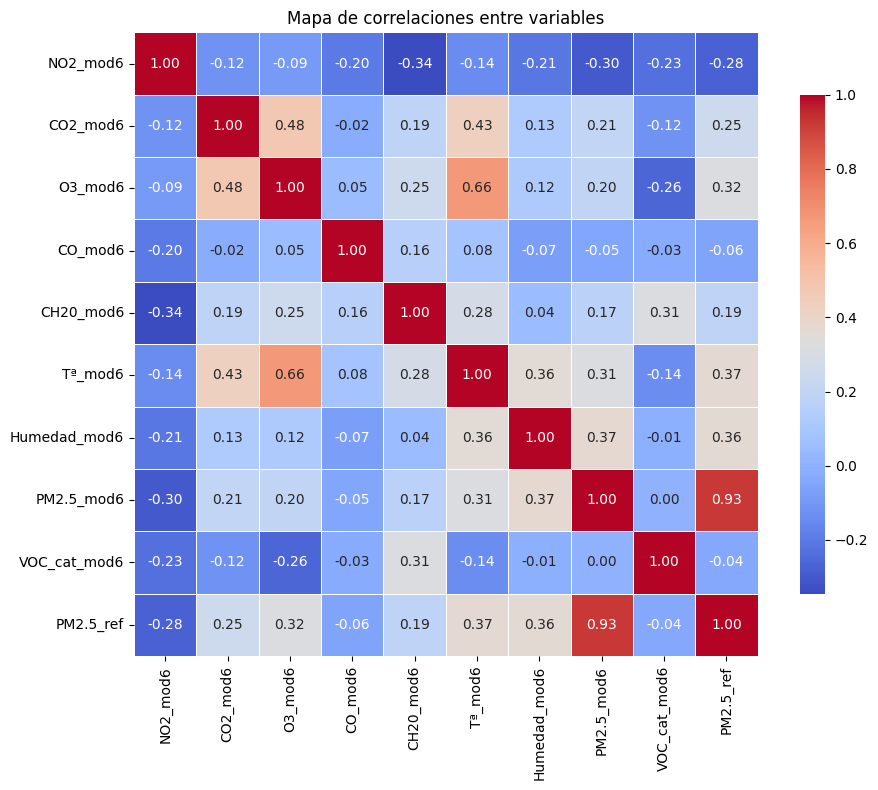

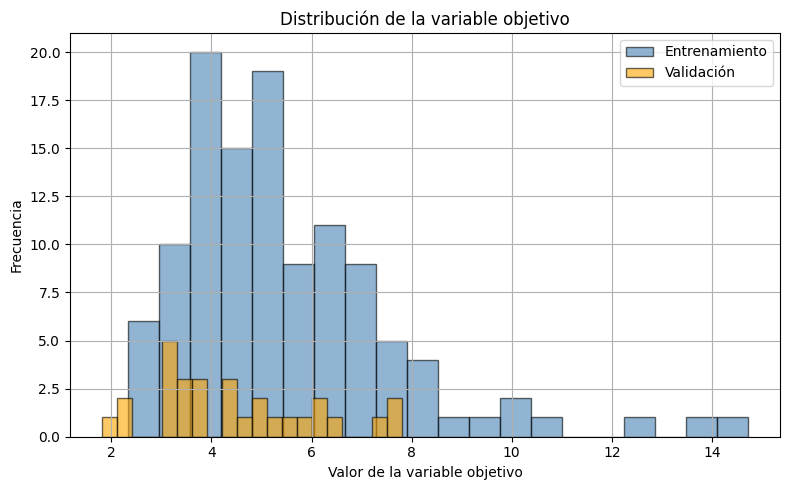

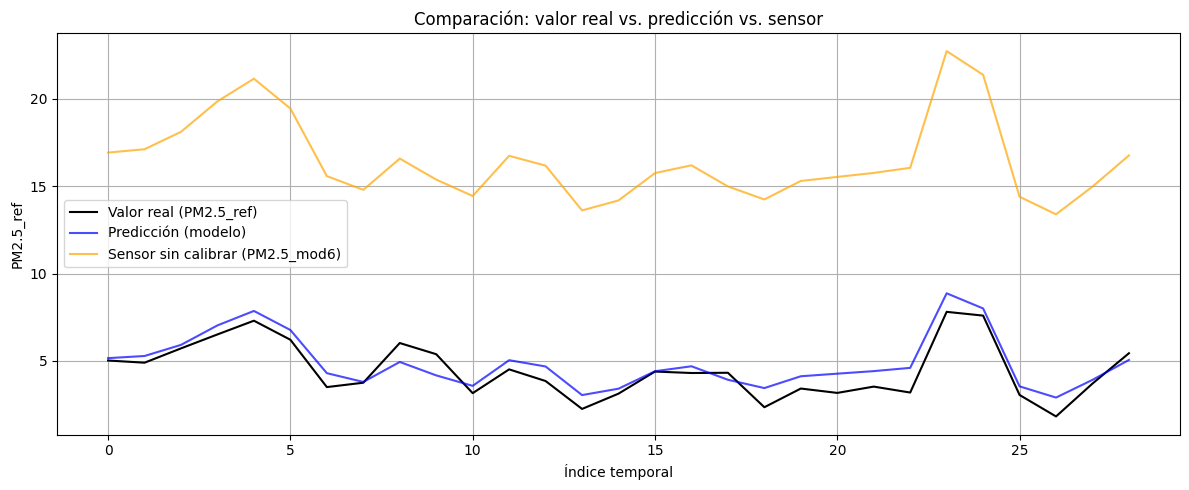

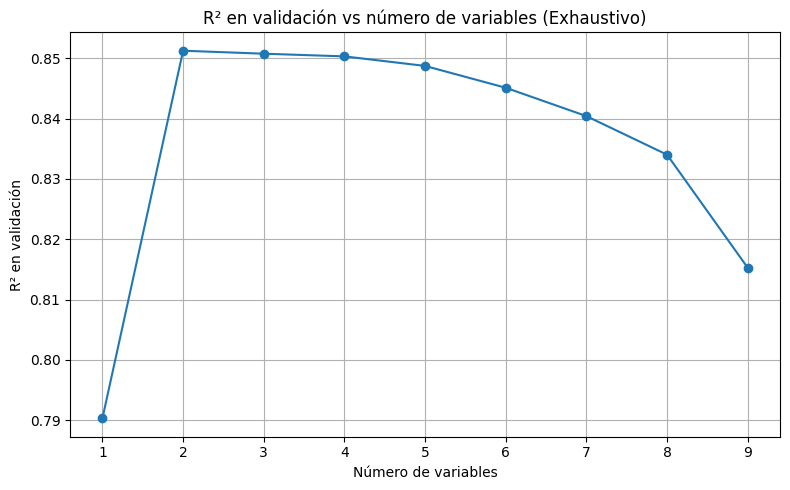

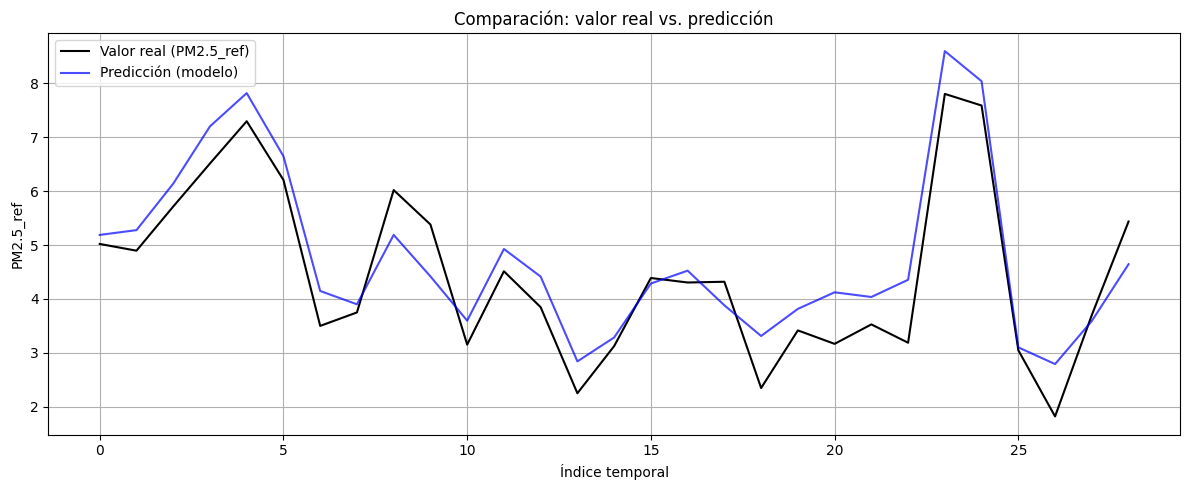

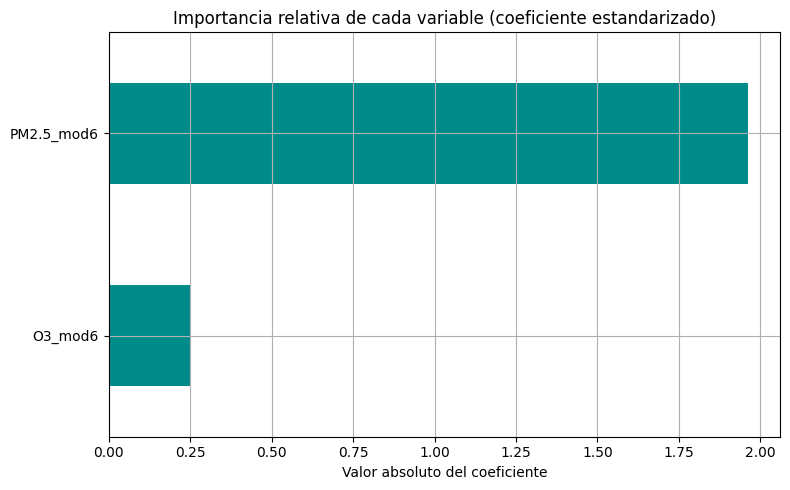

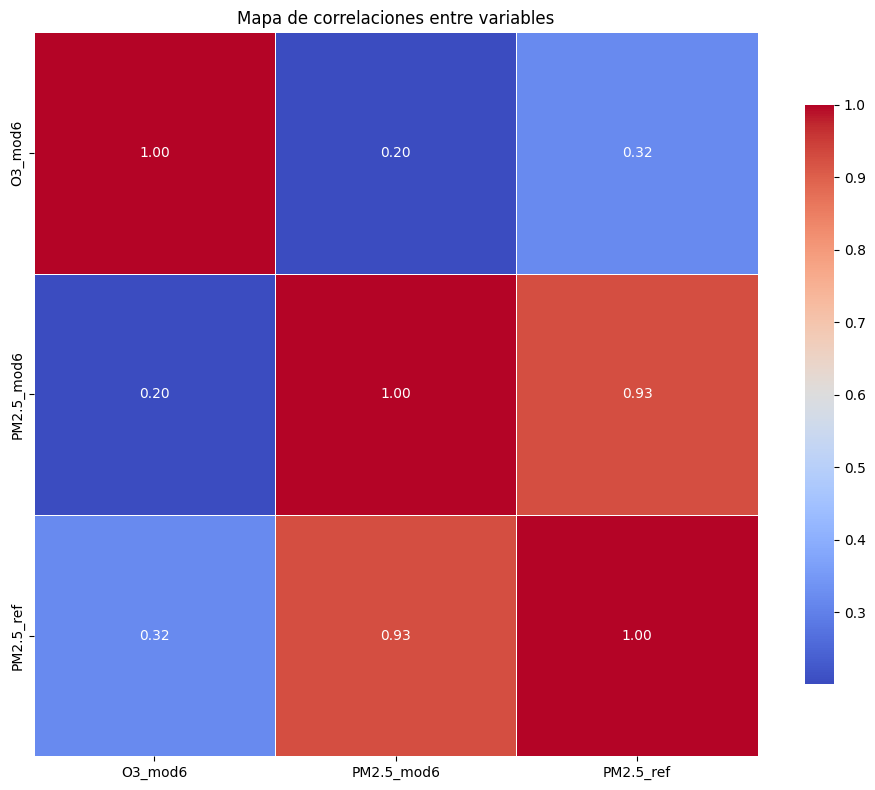

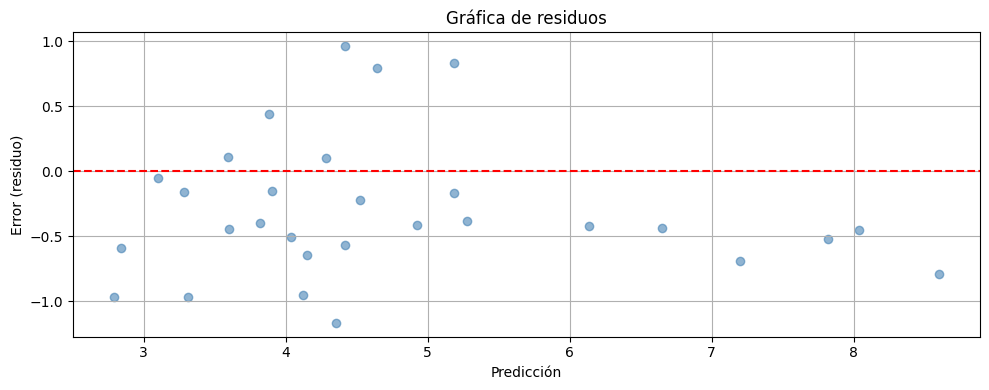

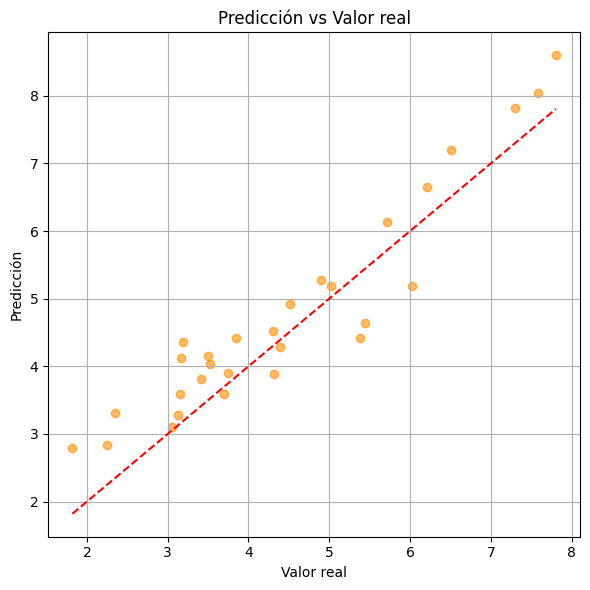

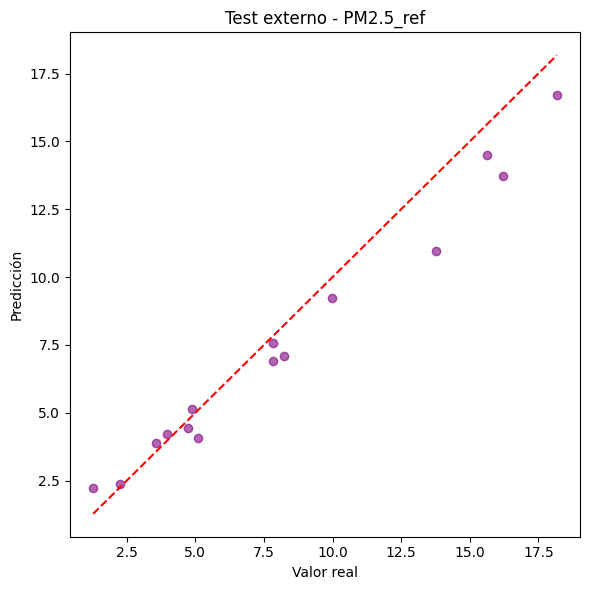


=== Ejecutando para Módulo 6 y objetivo O3_ref ===
Modelo base solo con O3_mod6:
|               |     RMSE |     MAE |           R² |
|---------------|----------|---------|--------------|
| Entrenamiento |  8.42633 | 6.81552 |  5.52492e-05 |
| Validación    | 10.8013  | 8.80371 | -1.04768     |


Features: 511/511

Top 5 combinaciones de variables por $R^2$ en validación:
|   num_vars | features                                                                                 |   R2_train |    R2_val |
|------------|------------------------------------------------------------------------------------------|------------|-----------|
|          6 | ['O3_mod6', 'CO_mod6', 'CH20_mod6', 'Tª_mod6', 'PM2.5_mod6', 'VOC_cat_mod6']             |   0.219874 | -0.275631 |
|          5 | ['O3_mod6', 'CH20_mod6', 'Tª_mod6', 'PM2.5_mod6', 'VOC_cat_mod6']                        |   0.219816 | -0.278408 |
|          7 | ['CO2_mod6', 'O3_mod6', 'CO_mod6', 'CH20_mod6', 'Tª_mod6', 'PM2.5_mod6', 'VOC_cat_mod6'] |   0.256098 | -0.281122 |
|          6 | ['CO2_mod6', 'O3_mod6', 'CH20_mod6', 'Tª_mod6', 'PM2.5_mod6', 'VOC_cat_mod6']            |   0.255577 | -0.288562 |
|          5 | ['O3_mod6', 'CO_mod6', 'CH20_mod6', 'Tª_mod6', 'PM2.5_mod6']                             |   0.219394 | -0.288827 |

Comparativa de métricas 

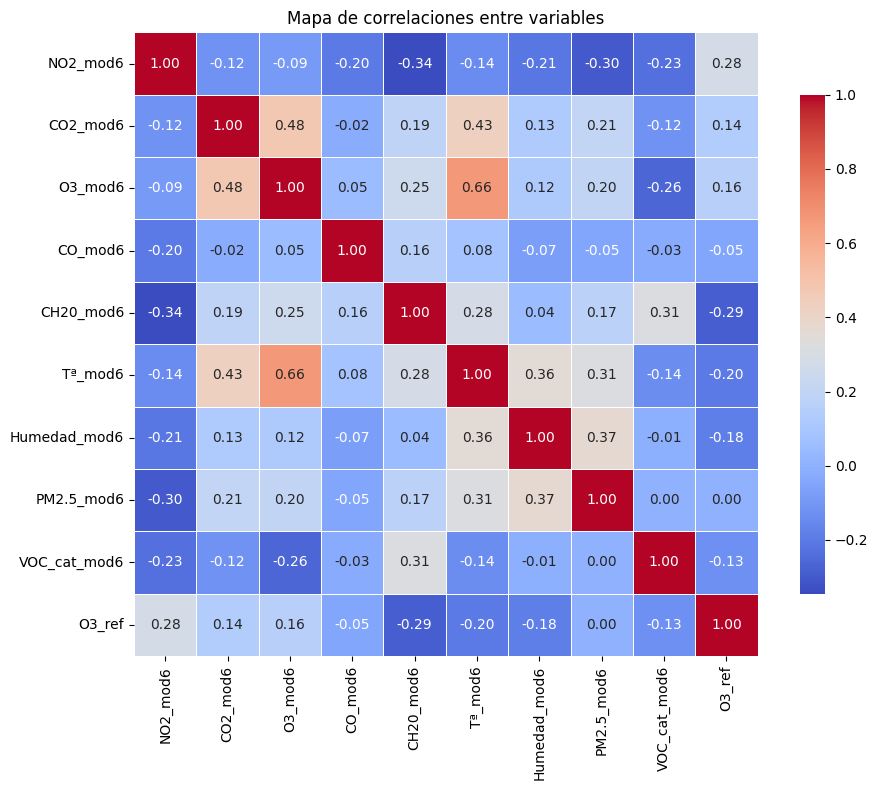

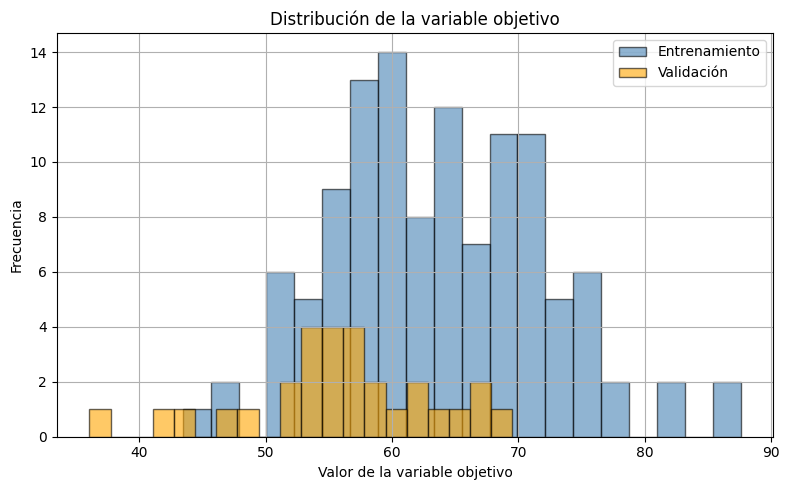

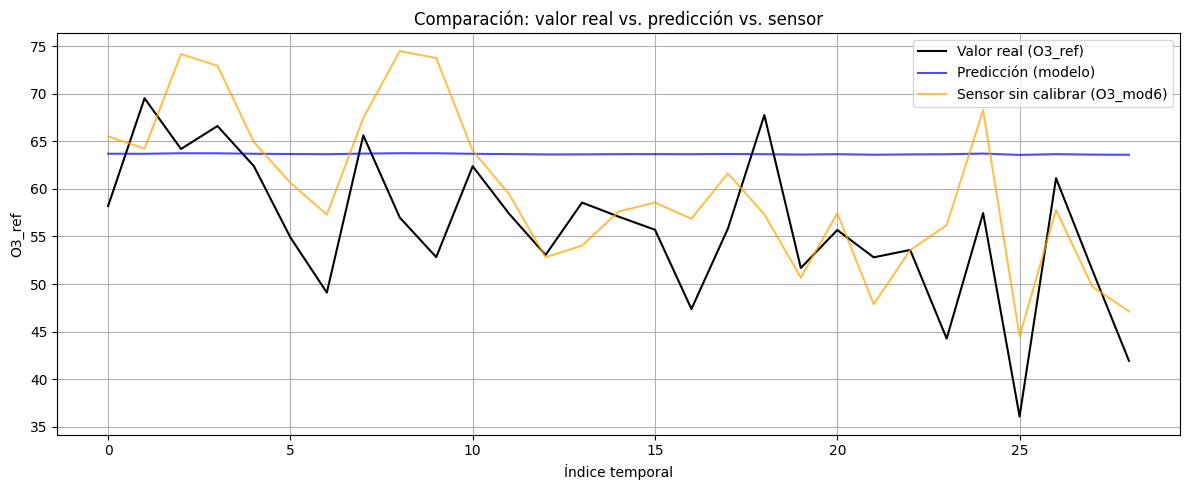

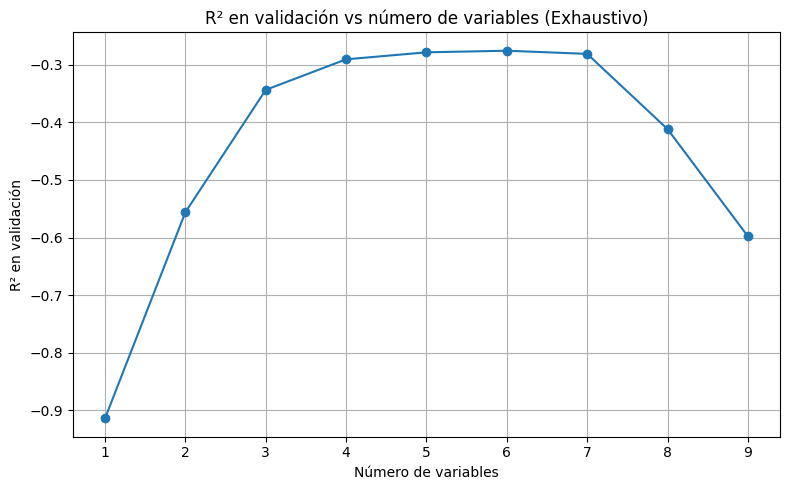

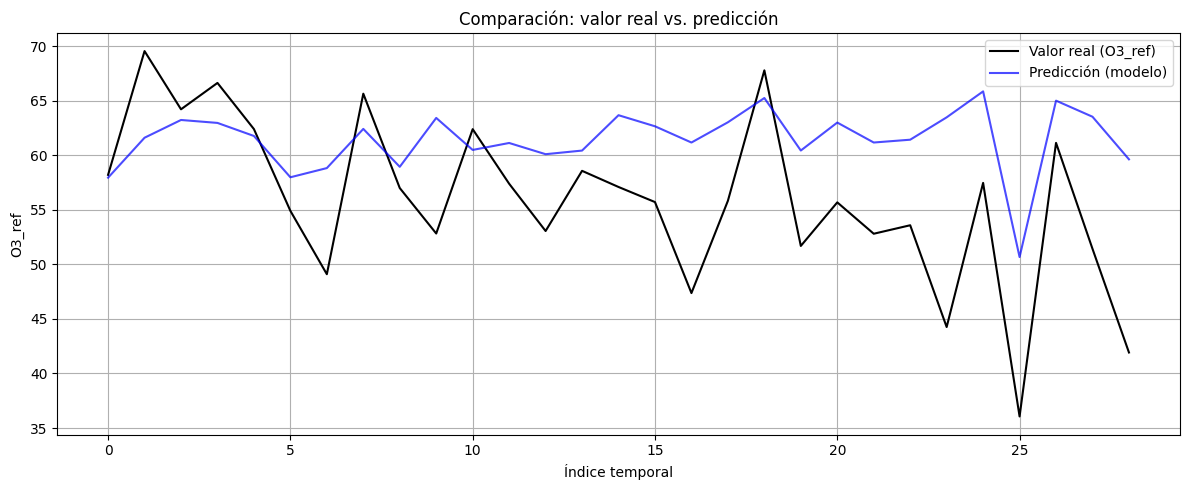

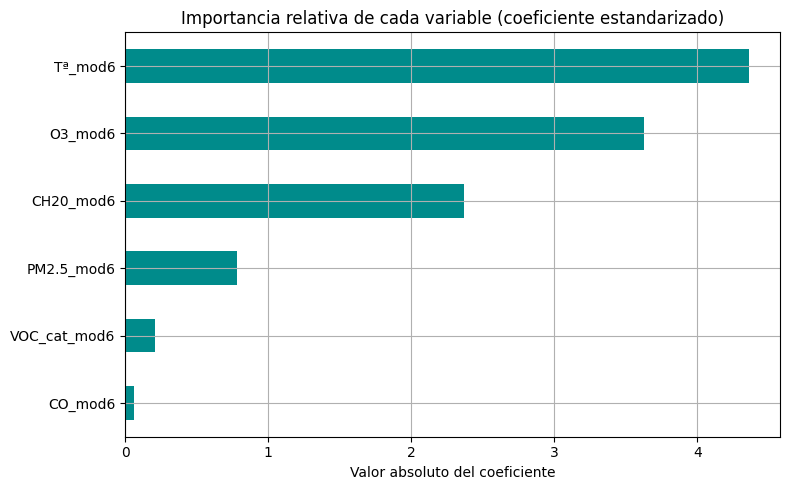

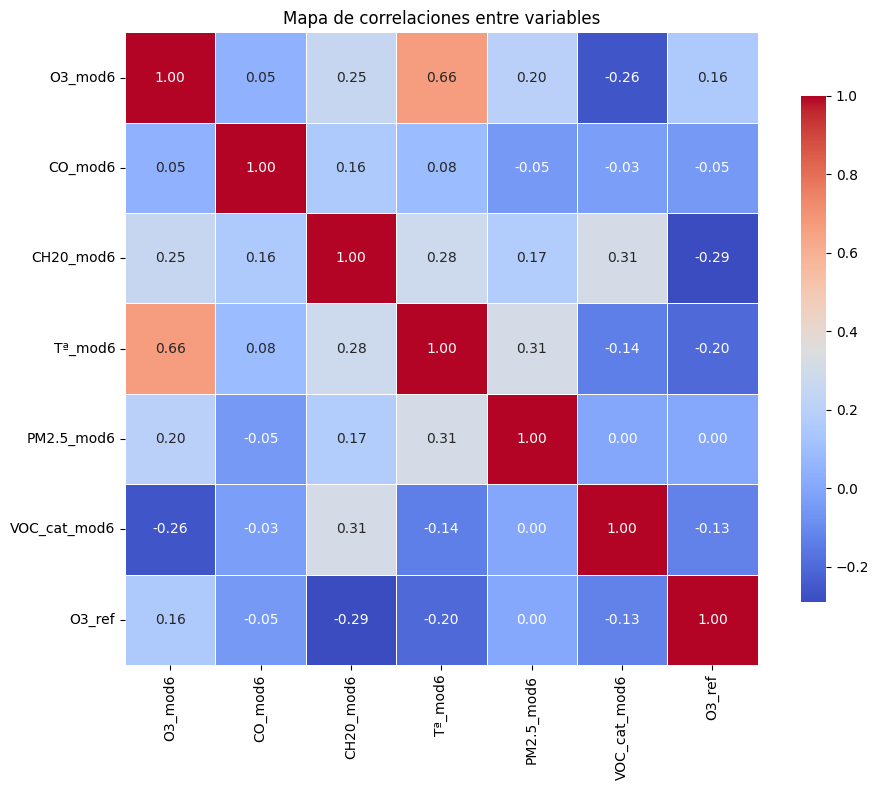

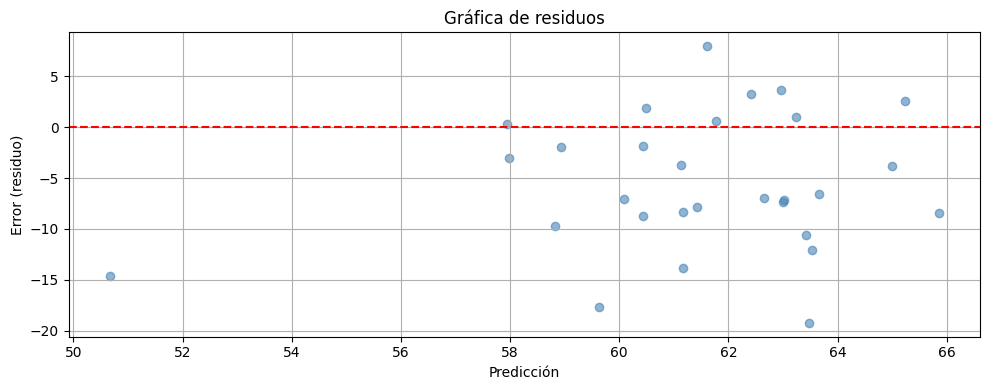

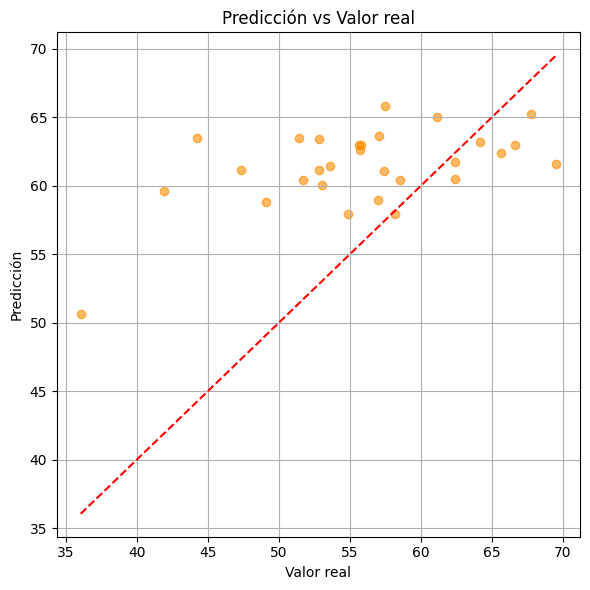

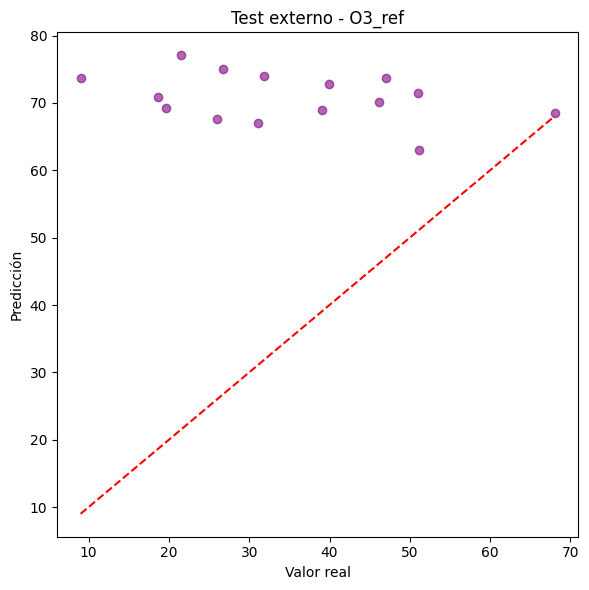


=== Ejecutando para Módulo 6 y objetivo NO2_ref ===


Features: 511/511

Top 5 combinaciones de variables por $R^2$ en validación:
|   num_vars | features                                        |   R2_train |   R2_val |
|------------|-------------------------------------------------|------------|----------|
|          2 | ['O3_mod6', 'CH20_mod6']                        |   0.134352 | 0.264887 |
|          3 | ['O3_mod6', 'CO_mod6', 'CH20_mod6']             |   0.135877 | 0.262715 |
|          3 | ['NO2_mod6', 'O3_mod6', 'CH20_mod6']            |   0.1745   | 0.248498 |
|          4 | ['NO2_mod6', 'O3_mod6', 'CO_mod6', 'CH20_mod6'] |   0.179578 | 0.2437   |
|          3 | ['O3_mod6', 'CH20_mod6', 'PM2.5_mod6']          |   0.136145 | 0.237825 |

Comparativa de métricas (mejor combinación):
|               |    RMSE |     MAE |       R² |
|---------------|---------|---------|----------|
| Entrenamiento | 5.78589 | 4.49397 | 0.134352 |
| Validación    | 3.32594 | 2.63931 | 0.264887 |

Intercepto: -19.505329600842956
O3_mod6: -0.1854
CH20_mod6: 2.4970

📌 Import

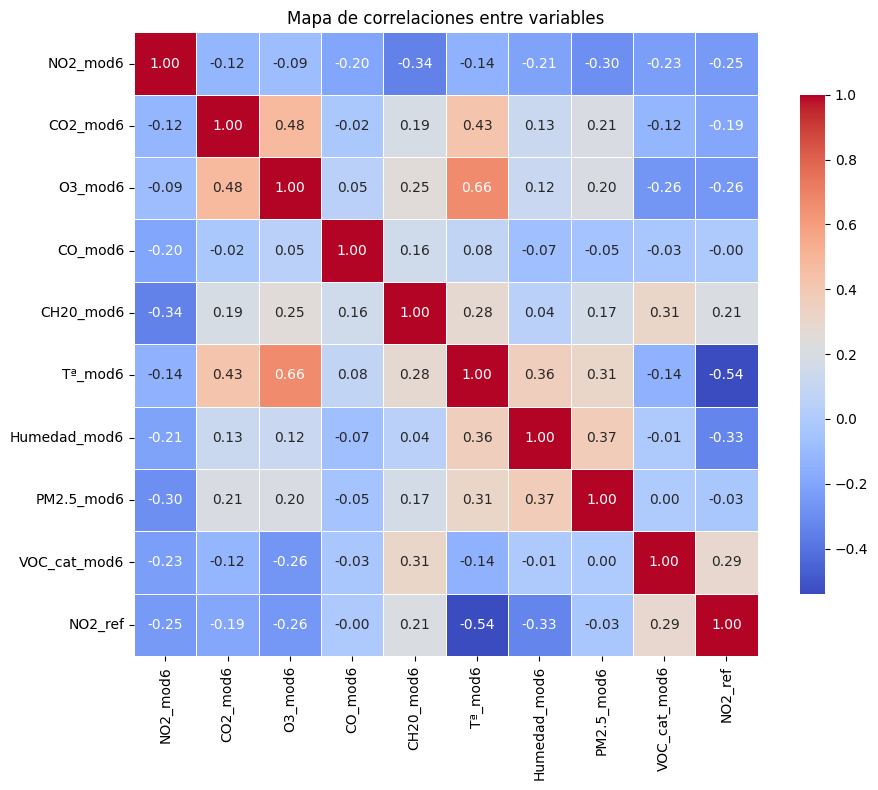

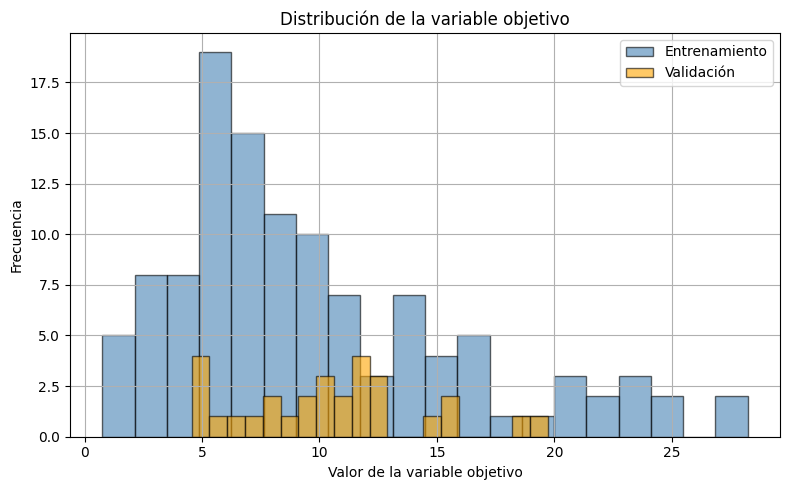

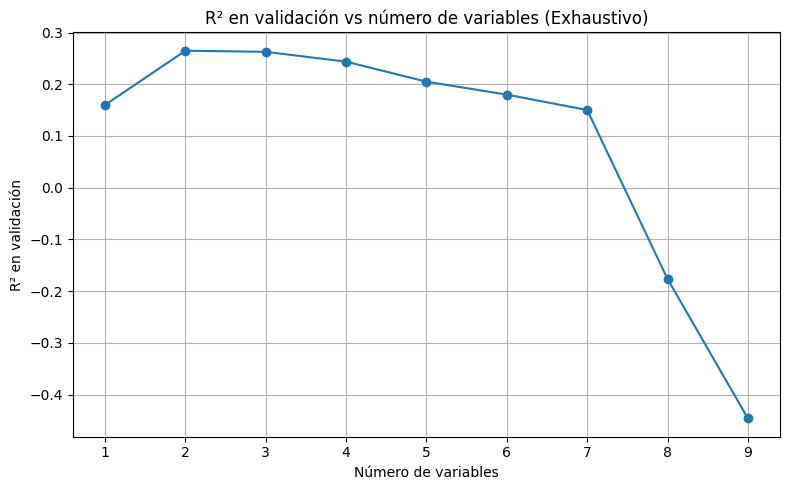

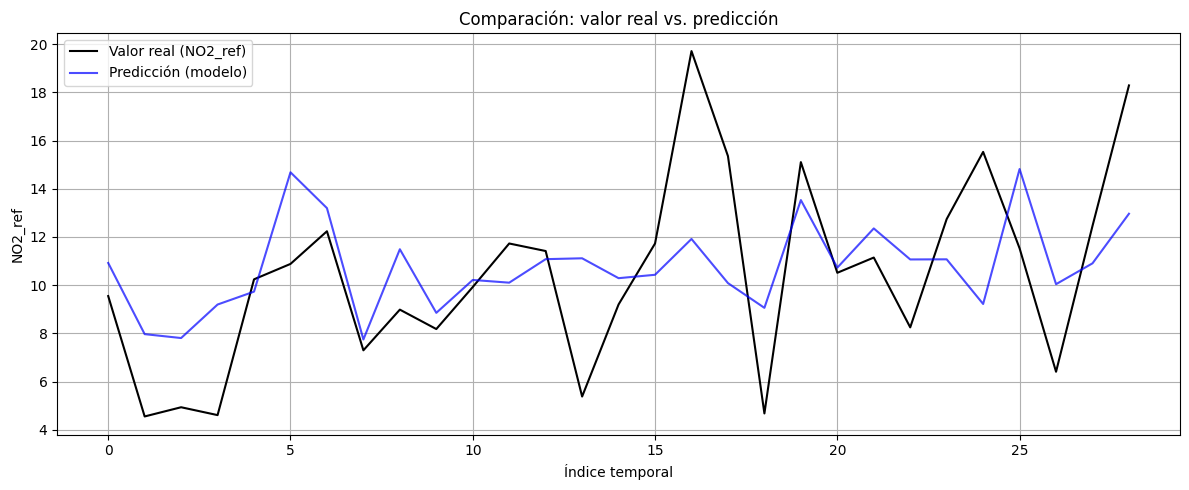

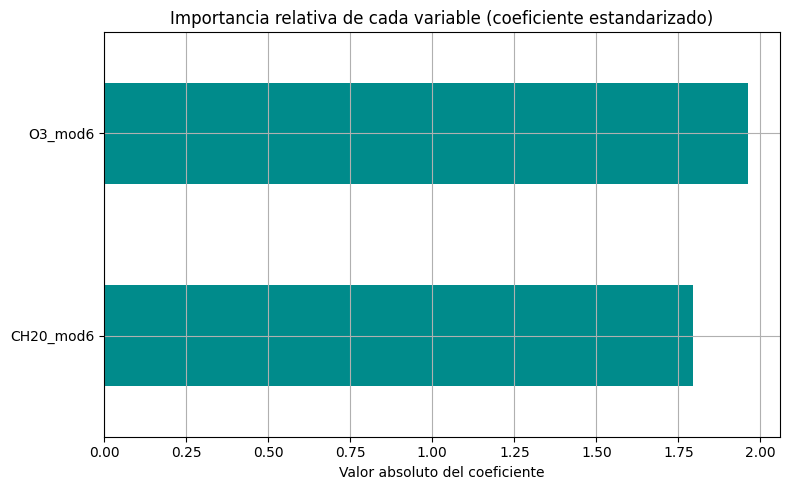

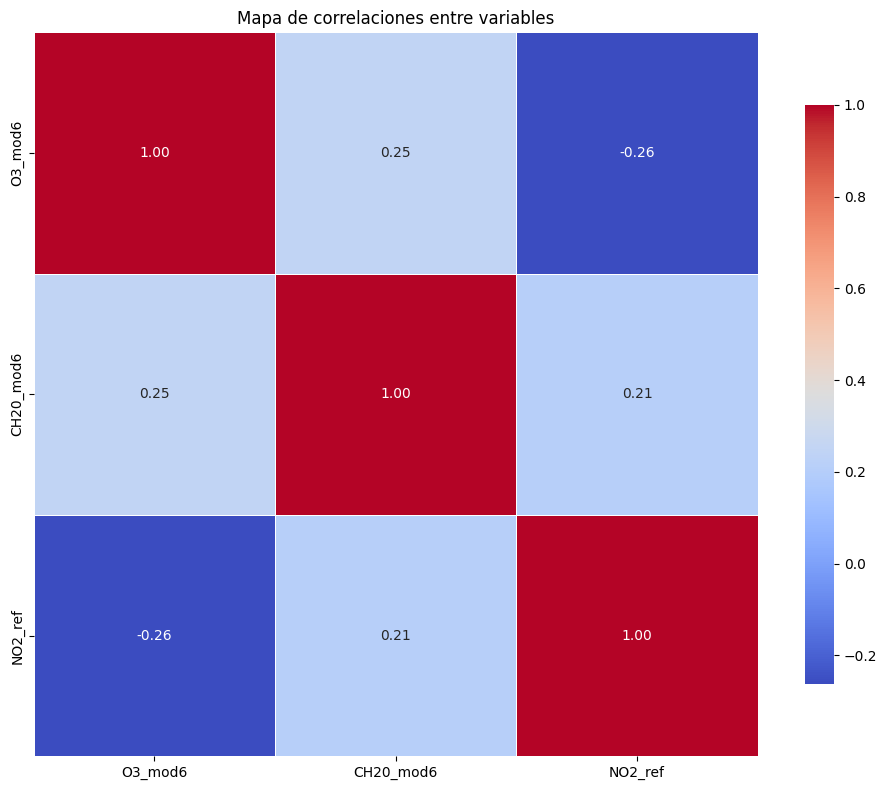

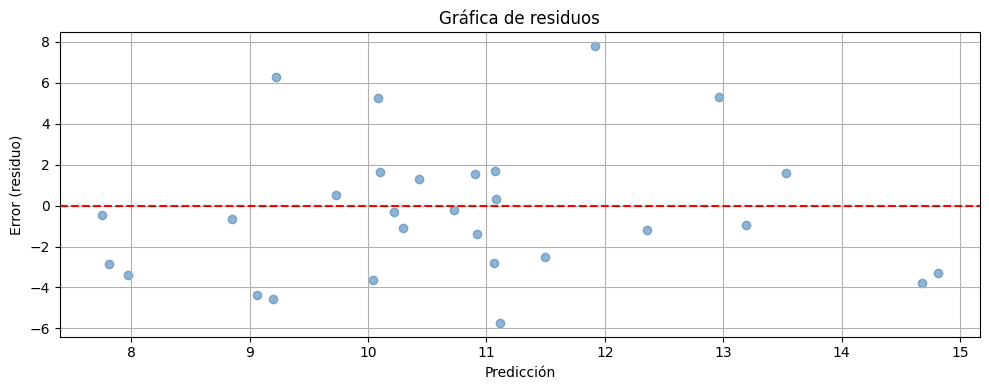

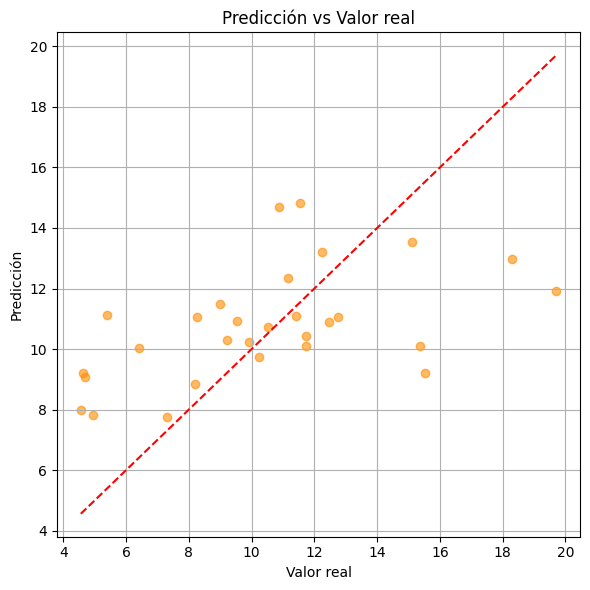

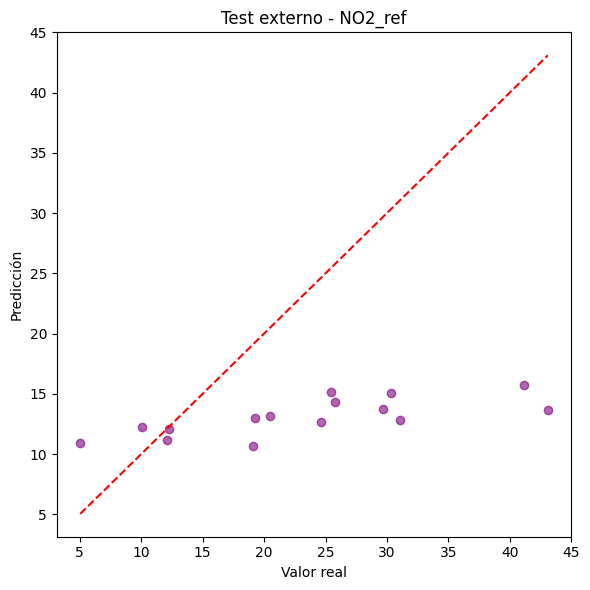

In [23]:
variables_objetivo = ['PM2.5_ref', 'O3_ref', 'NO2_ref']

# Variables predictoras del módulo 6
predictoras_mod6 = [f"{var}_mod6" for var in ['NO2', 'CO2', 'O3', 'CO', 'CH20', 'Tª', 'Humedad', 'PM2.5', 'VOC_cat']]

# Ejecutar para cada variable objetivo
for target in variables_objetivo:
    sensor_var = 'PM2.5_mod6' if target == 'PM2.5_ref' else \
                 'O3_mod6' if target == 'O3_ref' else \
                 'NO2_mod6'

    print(f"\n=== Ejecutando para Módulo 6 y objetivo {target} ===")
    ejecutar_pipeline_regresion(
        df=media_diaria,
        predictors=predictoras_mod6,
        target_var=target,
        sensor_var=None if target == 'NO2_ref' else sensor_var,
        df_test = media_diaria_test# omitimos sensor en NO2
    )


In [8]:
print(media_diaria.columns)

Index(['fecha_dia', 'NO2_mod1', 'CO2_mod1', 'O3_mod1', 'CO_mod1', 'CH20_mod1',
       'Tª_mod1', 'Humedad_mod1', 'PM1.0_mod1', 'PM2.5_mod1',
       ...
       'Humedad_mod10', 'PM1.0_mod10', 'PM2.5_mod10', 'PM10.0_mod10',
       'Hora_mod10', 'modid_mod10', 'VOC_cat_mod10', 'PM2.5_ref', 'O3_ref',
       'NO2_ref'],
      dtype='object', length=134)


In [11]:
print(media_diaria.columns)

Index(['fecha_dia', 'NO2_mod1', 'CO2_mod1', 'O3_mod1', 'CO_mod1', 'CH20_mod1',
       'Tª_mod1', 'Humedad_mod1', 'PM1.0_mod1', 'PM2.5_mod1',
       ...
       'Humedad_mod10', 'PM1.0_mod10', 'PM2.5_mod10', 'PM10.0_mod10',
       'Hora_mod10', 'modid_mod10', 'VOC_cat_mod10', 'PM2.5_ref', 'O3_ref',
       'NO2_ref'],
      dtype='object', length=134)


In [24]:
import shutil
from google.colab import files

# Crear un archivo ZIP con todo el contenido de la carpeta 'graficas'
shutil.make_archive('graficas', 'zip', 'graficas')

# Descargar el archivo ZIP
files.download('graficas.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def entrenar_modelo_con_correccion(df, features, target_var, sensor_var=None):
    # Paso 1: Entrenar modelo base
    modelo_base, train_metrics, val_metrics = entrenar_xgboost(
        df=df,
        features=features,
        target_var=target_var,
        sensor_var=sensor_var,
        nombre_modelo='base'
    )

    # Paso 2: Calcular residuo en conjunto de entrenamiento y validación
    split_index = int(len(df) * 0.8)
    X = df[features]
    y = df[target_var]
    X_train, X_val = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_val = y.iloc[:split_index], y.iloc[split_index:]

    evals_result = modelo_base.evals_result()
    best_iter = np.argmin(evals_result['validation_1']['mae'])

    y_train_pred = modelo_base.predict(X_train, iteration_range=(0, best_iter + 1))
    y_val_pred = modelo_base.predict(X_val, iteration_range=(0, best_iter + 1))

    residuo_train = y_train - y_train_pred
    residuo_val = y_val - y_val_pred

    # Paso 3: Entrenar modelo de corrección del error
    modelo_residuo = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=2,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42
    )
    modelo_residuo.fit(X_train, residuo_train)

    # Paso 4: Predecir residuo y corregir la predicción original
    residuo_train_pred = modelo_residuo.predict(X_train)
    residuo_val_pred = modelo_residuo.predict(X_val)

    y_train_pred_corr = y_train_pred + residuo_train_pred
    y_val_pred_corr = y_val_pred + residuo_val_pred

    # Paso 5: Evaluar resultados corregidos
    def eval_metrics(y_true, y_pred):
        return {
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'MAE': mean_absolute_error(y_true, y_pred),
            'R2': r2_score(y_true, y_pred),
            'MAPE': mean_absolute_percentage_error(y_true, y_pred),
            'EVS': explained_variance_score(y_true, y_pred)
        }

    train_corr_metrics = eval_metrics(y_train, y_train_pred_corr)
    val_corr_metrics = eval_metrics(y_val, y_val_pred_corr)

    print("\n✅ Resultados tras corrección del error:")
    print("Entrenamiento corregido:", train_corr_metrics)
    print("Validación corregida:", val_corr_metrics)

    # Comparativa visual: antes vs. después
    plt.figure(figsize=(10, 5))
    plt.plot(y_val.values, label="Valor real", color="black")
    plt.plot(y_val_pred, label="Predicción base", color="blue")
    plt.plot(y_val_pred_corr, label="Predicción corregida", color="green")
    plt.title("Comparación temporal - Predicción base vs corregida")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"graficas/{target_var}_comparacion_corregida.png")
    plt.show()

        # Gráfica: Predicción corregida vs. valor real
    plt.figure(figsize=(6, 6))
    plt.scatter(y_val, y_val_pred_corr, alpha=0.6)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
    plt.xlabel("Valor real")
    plt.ylabel("Predicción corregida")
    plt.title(f"Predicción vs Real (corregida) - {target_var}")
    plt.tight_layout()
    plt.savefig(f'graficas/{target_var}_corregido_pred_vs_real.png')
    plt.show()

    # Gráfica: residuos tras corrección
    residuos_corr = y_val - y_val_pred_corr
    plt.figure(figsize=(10, 4))
    plt.scatter(y_val_pred_corr, residuos_corr, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicción corregida")
    plt.ylabel("Residuo")
    plt.title(f"Gráfico de residuos (corregido) - {target_var}")
    plt.tight_layout()
    plt.savefig(f'graficas/{target_var}_corregido_residuos.png')
    plt.show()



    return modelo_base, modelo_residuo, train_corr_metrics, val_corr_metrics

In [ ]:
# Ejecutar el entrenamiento con corrección de error
modelo_base, modelo_residuo, train_corr_metrics, val_corr_metrics = entrenar_modelo_con_correccion(
    df=df,
    features=features,
    target_var='NO2_ref',
    sensor_var='NO2'
)